# Main plotting script MATCH2BRAIN
## Use testonperturbed & make all comparisons relative to *original* and *random-wl*

### 1. Use plot_utils.py script to get scores dataframe

In [2]:
MAD_corrected = False

#MAD errors are scaled by 1.4826
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_absolute_deviation.html
#The scaling factor applied to the MAD.
#The default scale (1.4826) ensures consistency with the standard deviation for normally distributed data.

In [3]:
save = False

In [4]:
#import packages
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

In [5]:
# import from other scripts
import plot_utils
import stats_utils

In [6]:
model_identifier="gpt2-xl"
emb_context="Passage"
split_coord="Sentence"
testonperturbed=True
randomnouns=False

### Get stimuli

In [7]:
# function check (this is done in the main function below!)
stimuli_df = plot_utils.get_sample_stimuli(randomnouns=randomnouns)
stimuli_df

Loading lookup from /om2/user/ckauf/anaconda39/envs/perturbed3.8/lib/python3.8/site-packages/brainio_collection/lookup.csv
/net/vast-storage.ib.cluster/scratch/vast/cpl/ckauf/perturbed-neural-nlp/neural_nlp/../ressources/stimuli
I AM USING THE NEW SPLIT FUNCTION
I AM USING THE NEW CROSSVALIDATION SCRIPT


,condition,stimulus
0,original,beekeeping encourages the conservation of loca...
1,scrambled1,beekeeping encourages the conservation of habi...
2,scrambled3,beekeeping conservation encourages the of habi...
3,scrambled5,conservation beekeeping encourages the habitat...
4,scrambled7,beekeeping conservation of encourages habitats...
5,backward,habitats local of conservation the encourages ...
6,lowpmi,beekeeping conservation habitats the of encour...
7,lowpmi-random,encourages the beekeeping of habitats conserva...
8,nouns,conservation habitats.
9,nounsverbs,beekeeping encourages conservation habitats.


In [8]:
# function check (this is done in the main function below!)
scores_df = plot_utils.get_best_scores_df(model_identifier=model_identifier,
                                          emb_context=emb_context,
                                          split_coord=split_coord,
                                          testonperturbed=testonperturbed,
                                          randomnouns=randomnouns)
scores_df

,score,error,condition,category
0,1.107199,0.141840,original,original
1,1.019374,0.120393,scrambled1,word-order
2,0.924364,0.086006,scrambled3,word-order
3,0.907545,0.071722,scrambled5,word-order
4,0.914475,0.099400,scrambled7,word-order
5,0.835083,0.064965,backward,word-order
6,0.933212,0.070269,lowpmi,word-order
7,0.889217,0.093797,lowpmi-random,word-order
8,0.644818,0.078112,nouns,information-loss
9,0.808808,0.098496,nounsverbs,information-loss


### 2.  Correct for MAD functionality
`NOTE: This is *not* done in the Schrimpf paper`

In [9]:
# function check (this is done in the main function below!)
if MAD_corrected:
    scores_df["error"] = scores_df["error"].div(1.4826) #MAD is wrong
    
scores_df.head()

,score,error,condition,category
0,1.107199,0.141840,original,original
1,1.019374,0.120393,scrambled1,word-order
2,0.924364,0.086006,scrambled3,word-order
3,0.907545,0.071722,scrambled5,word-order
4,0.914475,0.099400,scrambled7,word-order


### merge with stimuli df

In [10]:
full_df = scores_df.merge(stimuli_df, on='condition', how='inner')
full_df

,score,error,condition,category,stimulus
0,1.107199,0.141840,original,original,beekeeping encourages the conservation of loca...
1,1.019374,0.120393,scrambled1,word-order,beekeeping encourages the conservation of habi...
2,0.924364,0.086006,scrambled3,word-order,beekeeping conservation encourages the of habi...
3,0.907545,0.071722,scrambled5,word-order,conservation beekeeping encourages the habitat...
4,0.914475,0.099400,scrambled7,word-order,beekeeping conservation of encourages habitats...
5,0.835083,0.064965,backward,word-order,habitats local of conservation the encourages ...
6,0.933212,0.070269,lowpmi,word-order,beekeeping conservation habitats the of encour...
7,0.889217,0.093797,lowpmi-random,word-order,encourages the beekeeping of habitats conserva...
8,0.644818,0.078112,nouns,information-loss,conservation habitats.
9,0.808808,0.098496,nounsverbs,information-loss,beekeeping encourages conservation habitats.


In [11]:
full_df["labelname"] = [': '.join(i) for i in zip(full_df["condition"].map(str),full_df["stimulus"])]
full_df

,score,error,condition,category,stimulus,labelname
0,1.107199,0.141840,original,original,beekeeping encourages the conservation of loca...,original: beekeeping encourages the conservati...
1,1.019374,0.120393,scrambled1,word-order,beekeeping encourages the conservation of habi...,scrambled1: beekeeping encourages the conserva...
2,0.924364,0.086006,scrambled3,word-order,beekeeping conservation encourages the of habi...,scrambled3: beekeeping conservation encourages...
3,0.907545,0.071722,scrambled5,word-order,conservation beekeeping encourages the habitat...,scrambled5: conservation beekeeping encourages...
4,0.914475,0.099400,scrambled7,word-order,beekeeping conservation of encourages habitats...,scrambled7: beekeeping conservation of encoura...
5,0.835083,0.064965,backward,word-order,habitats local of conservation the encourages ...,backward: habitats local of conservation the e...
6,0.933212,0.070269,lowpmi,word-order,beekeeping conservation habitats the of encour...,lowpmi: beekeeping conservation habitats the o...
7,0.889217,0.093797,lowpmi-random,word-order,encourages the beekeeping of habitats conserva...,lowpmi-random: encourages the beekeeping of ha...
8,0.644818,0.078112,nouns,information-loss,conservation habitats.,nouns: conservation habitats.
9,0.808808,0.098496,nounsverbs,information-loss,beekeeping encourages conservation habitats.,nounsverbs: beekeeping encourages conservation...


## Get stats

In [12]:
CAT2COND, COND2CAT = plot_utils.get_conditions(randomnouns=randomnouns)
CAT2COND

{'original': ['original'],
 'word-order': ['scrambled1',
  'scrambled3',
  'scrambled5',
  'scrambled7',
  'backward',
  'lowpmi',
  'lowpmi-random'],
 'information-loss': ['nouns',
  'nounsverbs',
  'nounsverbsadj',
  'contentwords',
  'functionwords'],
 'semantic-distance': ['sentenceshuffle_passage',
  'sentenceshuffle_topic',
  'sentenceshuffle_random'],
 'control': ['random-wl']}

In [13]:
import scipy
import statsmodels

#Benjamini/Hochberg corrected
def get_ttest_results(model_identifier, emb_context="Passage", split_coord="Sentence",
                testonperturbed=False, category=None, randomnouns=False):
    
    subdf = stats_utils.get_stats_df(model_identifier=model_identifier, emb_context=emb_context,
                                     split_coord=split_coord, testonperturbed=testonperturbed,
                                    randomnouns = randomnouns)
    
    pvals2original, pvals2random = [], []
    ttest2original, ttest2random = [], []
    cohensd2original, cohensd2random = [], []
    conds = []
    
    for cond in CAT2COND[category]:
        
        #adjust names for consistency
        if cond == 'sentenceshuffle_random':
            cond = 'sent_random'
        elif cond == 'sentenceshuffle_passage':
            cond = 'sent_passage'
        elif cond == 'sentenceshuffle_topic':
            cond = 'sent_topic'

        #get subject scores
        original_scores = list(subdf[subdf['condition'] == 'original']["values"])
        cond_scores = list(subdf[subdf['condition'] == cond]["values"])
        random_scores = list(subdf[subdf['condition'] == 'random-wl']["values"])
        
        #get ttest
        ttest2orig, pval2orig = scipy.stats.ttest_ind(original_scores,cond_scores)
        ttest2rand, pval2rand = scipy.stats.ttest_ind(random_scores,cond_scores)
        
        # get effect size
        cohensd2orig = stats_utils.cohens_d(original_scores, cond_scores)
        cohensd2rand = stats_utils.cohens_d(random_scores, cond_scores)
        
        conds.append(cond)
        pvals2original.append(pval2orig)
        ttest2original.append(ttest2orig)
        pvals2random.append(pval2rand)
        ttest2random.append(ttest2rand)
        cohensd2original.append(cohensd2orig)
        cohensd2random.append(cohensd2rand)
        
    # correct for multiple comparisons
    # statsmodels.stats.multitest.fdrcorrection(pvals) = statsmodels.stats.multitest.multipletests(pvals, method='fdr_bh')
    # first output is list of Booleans indicating whether to reject null hypothesis or not
    _, adjusted_pvals2original = statsmodels.stats.multitest.fdrcorrection(pvals2original)
    _, adjusted_pvals2random = statsmodels.stats.multitest.fdrcorrection(pvals2random)
    
    #assign significance levels
    significance2original = stats_utils.assign_significance_labels(adjusted_pvals2original)
    significance2random = stats_utils.assign_significance_labels(adjusted_pvals2random)
    
    
    stats_df = pd.DataFrame({
        "condition": conds,
        "ttest2original" : ttest2original,
        "ttest2random" : ttest2random,
        "adjusted_pvals2original" : adjusted_pvals2original,
        "adjusted_pvals2random" : adjusted_pvals2random,
        "cohensd2original" : cohensd2original,
        "cohensd2random" : cohensd2random,
        "significance2original" : significance2original,
        "significance2random" : significance2random,
        "pvals2original" : pvals2original,
        "pvals2random" : pvals2random
    })
    
    return stats_df

In [14]:
if randomnouns:
    subdf = stats_utils.get_stats_df(model_identifier=model_identifier, emb_context=emb_context,
                                     split_coord=split_coord, testonperturbed=testonperturbed,
                                    randomnouns = randomnouns)
    
    randomnouns_scores = list(subdf[subdf['condition'] == 'random-nouns']["values"])
    functionword_scores = list(subdf[subdf['condition'] == 'functionwords']["values"])
    #get ttest
    ttest, pval = scipy.stats.ttest_ind(randomnouns_scores, functionword_scores)
    # get effect size
    cohensd = stats_utils.cohens_d(randomnouns_scores, functionword_scores)
    print(f"RANDOM NOUNS vs. FUNCTIONWORDS \nttest: {ttest} \npval: {pval} \ncohen's d: {cohensd}")

In [15]:
frames = []
for category in ["word-order", "information-loss", "semantic-distance"]:
    stats_df = get_ttest_results(model_identifier=model_identifier,
                      emb_context=emb_context,
                      split_coord=split_coord,
                      testonperturbed=testonperturbed,
                      category=category, randomnouns=randomnouns)
    frames.append(stats_df)
full_stats_df = pd.concat(frames)
full_stats_df

,condition,ttest2original,ttest2random,adjusted_pvals2original,adjusted_pvals2random,cohensd2original,cohensd2random,significance2original,significance2random,pvals2original,pvals2random
0,scrambled1,1.278297,-18.532649,2.173829e-01,4.169681e-13,0.571672,-8.288052,n.s.,***,2.173829e-01,3.574013e-13
1,scrambled3,3.415087,-21.212587,3.601046e-03,9.795906e-14,1.527273,-9.486557,**,***,3.086610e-03,3.478449e-14
2,scrambled5,3.644457,-20.845106,3.245156e-03,9.795906e-14,1.629851,-9.322215,**,***,1.854375e-03,4.708901e-14
3,scrambled7,3.668394,-20.637976,3.245156e-03,9.795906e-14,1.640556,-9.229584,**,***,1.758147e-03,5.597661e-14
4,backward,5.329610,-18.023275,3.202245e-04,5.760193e-13,2.383474,-8.060254,***,***,4.574636e-05,5.760193e-13
5,lowpmi,3.487580,-22.346267,3.601046e-03,9.795906e-14,1.559693,-9.993554,**,***,2.628205e-03,1.407780e-14
6,lowpmi-random,4.568393,-19.099773,8.338803e-04,2.981863e-13,2.043047,-8.541678,***,***,2.382515e-04,2.129902e-13
0,nouns,10.827683,-12.840676,6.478799e-09,2.104915e-10,4.842287,-5.742525,***,***,2.591519e-09,1.683932e-10
1,nounsverbs,6.029842,-15.523387,1.767071e-05,1.812897e-11,2.696627,-6.942270,***,***,1.060242e-05,7.251589e-12
2,nounsverbsadj,4.420397,-14.795807,4.127864e-04,2.701578e-11,1.976862,-6.616886,***,***,3.302291e-04,1.620947e-11


In [16]:
full_stats_df.to_csv("results_paper/figure1_stats.csv",index=False)

In [17]:
full_stats_df[['condition', 'ttest2original', 'adjusted_pvals2original', 'cohensd2original']]

,condition,ttest2original,adjusted_pvals2original,cohensd2original
0,scrambled1,1.278297,2.173829e-01,0.571672
1,scrambled3,3.415087,3.601046e-03,1.527273
2,scrambled5,3.644457,3.245156e-03,1.629851
3,scrambled7,3.668394,3.245156e-03,1.640556
4,backward,5.329610,3.202245e-04,2.383474
5,lowpmi,3.487580,3.601046e-03,1.559693
6,lowpmi-random,4.568393,8.338803e-04,2.043047
0,nouns,10.827683,6.478799e-09,4.842287
1,nounsverbs,6.029842,1.767071e-05,2.696627
2,nounsverbsadj,4.420397,4.127864e-04,1.976862


In [18]:
full_stats_df[['condition', 'ttest2random', 'adjusted_pvals2random', 'cohensd2random']]

,condition,ttest2random,adjusted_pvals2random,cohensd2random
0,scrambled1,-18.532649,4.169681e-13,-8.288052
1,scrambled3,-21.212587,9.795906e-14,-9.486557
2,scrambled5,-20.845106,9.795906e-14,-9.322215
3,scrambled7,-20.637976,9.795906e-14,-9.229584
4,backward,-18.023275,5.760193e-13,-8.060254
5,lowpmi,-22.346267,9.795906e-14,-9.993554
6,lowpmi-random,-19.099773,2.981863e-13,-8.541678
0,nouns,-12.840676,2.104915e-10,-5.742525
1,nounsverbs,-15.523387,1.812897e-11,-6.942270
2,nounsverbsadj,-14.795807,2.701578e-11,-6.616886


## Plot

In [19]:
#define colors
CAT2COLOR = {
    "original": "dimgray",
    #
    "word-order": sns.cubehelix_palette(7, start=.2, rot=-.25, dark=0.2, light=.9, reverse=True),
    "information-loss": sns.cubehelix_palette(5, start=2, rot=0, dark=0.2, light=.85, reverse=True),
    #cut off as last gradient color is similar across colors
    "semantic-distance": sns.light_palette("maroon", 4, reverse=True)[:3],
    #
    "control": "lightgray"
}

if randomnouns:
    CAT2COLOR["information-loss"] = sns.cubehelix_palette(6, start=2, rot=0, dark=0.2, light=.85, reverse=True)

In [20]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

custom_params = {"axes.spines.right": False,
                 "axes.spines.top": False,
                 'ytick.left': True,
                 'xtick.bottom': True,
                'grid.linestyle': "" #gets rid of horizontal lines
                }
sns.set_theme(font_scale=1.4, style="white", rc=custom_params)

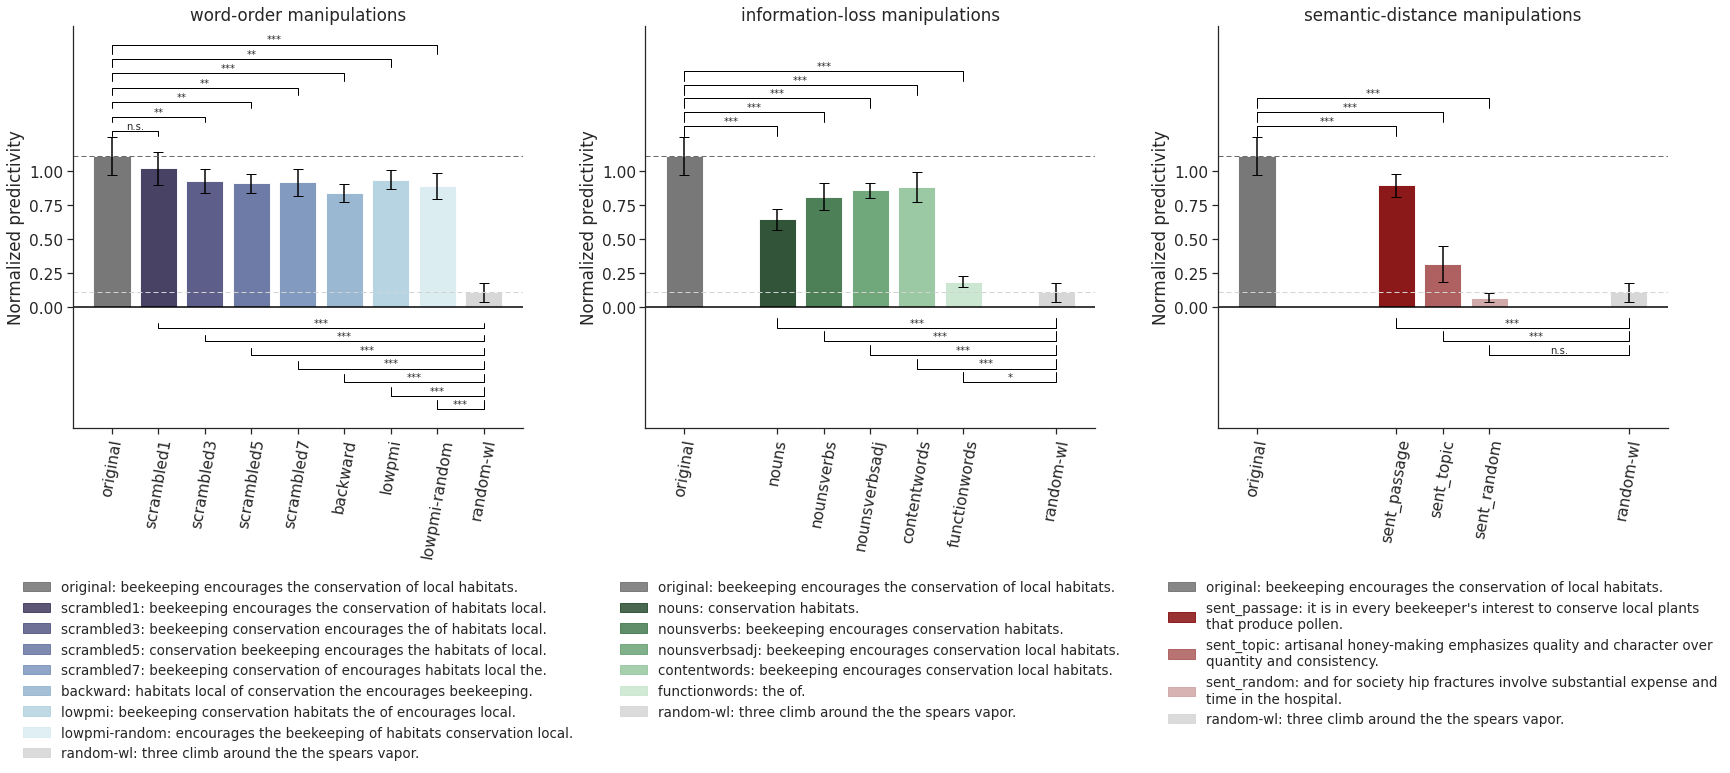

In [21]:
import math

categories = ["word-order", "information-loss", "semantic-distance"]
if randomnouns:
    categories = ["information-loss"]
    
num_bars = [len(full_df[full_df["category"] == cat]) for cat in categories]
max_bars = max(num_bars)
nrows = len(categories)

fig2 = plt.figure(constrained_layout=True, figsize=(8*nrows, 11), facecolor='white')
props = [1 + 0.2*x for x in num_bars]
spec2 = GridSpec(ncols=nrows, nrows=1, figure=fig2)
f2_ax = []

to_add = 0
    
for ind, current_category in enumerate(categories):
    #set up subplot
    if ind == 0:
        f2_ax.append(fig2.add_subplot(spec2[0, ind]))
    else:
        f2_ax.append(fig2.add_subplot(spec2[0, ind], sharey=f2_ax[0]))

    categories = ["original", current_category, "control"]
    plot_df = full_df[full_df["category"].isin(categories)]
    
    colors = [CAT2COLOR["original"]] + CAT2COLOR[current_category] + [CAT2COLOR["control"]]
    
    x_pos = np.arange(len(plot_df))
    scores = list(plot_df['score'])
    errors = list(plot_df['error'])
    conditions = list(plot_df['condition'])
                
    stimuli = [list(plot_df.loc[plot_df["category"] == cat]["labelname"]) for cat in categories]
    stimuli = plot_utils.flatten_list(stimuli)
    from textwrap import fill
    stimuli = [fill(l, 75) for l in stimuli]
    
    #add empty slots for same bar width
    if len(x_pos) != max_bars + 2: # +2 because of original and random-wl
        to_add = max_bars - num_bars[ind]
        x_pos = np.arange(len(plot_df) + to_add)
        multiplier1 = math.floor(to_add/2)
        multiplier2 = math.ceil(to_add/2)

        insert_at1 = 1
        insert_at2 = -1

        insert_elements1 = [np.nan]*multiplier1
        insert_elements2 = [np.nan]*multiplier2
        #
        scores[insert_at1:insert_at1] = insert_elements1
        scores[insert_at2:insert_at2] = insert_elements2
        #
        errors[insert_at1:insert_at1] = insert_elements1
        errors[insert_at2:insert_at2] = insert_elements2

        insert_elements1 = [""]*multiplier1
        insert_elements2 = [""]*multiplier2
        #
        conditions[insert_at1:insert_at1] = insert_elements1
        conditions[insert_at2:insert_at2] = insert_elements2
        #
        stimuli[insert_at1:insert_at1] = insert_elements1
        stimuli[insert_at2:insert_at2] = insert_elements2

        insert_elements1 = ["white"]*multiplier1
        insert_elements2 = ["white"]*multiplier2
        
        colors[insert_at1:insert_at1] = insert_elements1
        colors[insert_at2:insert_at2] = insert_elements2

    f2_ax[-1].bar(x_pos, scores,
        yerr=errors,
        align='center',
        alpha=0.9, #color intensity
        ecolor='black',
        capsize=5, #error-bar width
        color=colors)
    
    #annotate stats 2 original
    for ind_c, cond in enumerate(CAT2COND[current_category]):
        #adjust names for consistency
        if cond == 'sentenceshuffle_random':
            cond = 'sent_random'
        elif cond == 'sentenceshuffle_passage':
            cond = 'sent_passage'
        elif cond == 'sentenceshuffle_topic':
            cond = 'sent_topic'
            
        if cond in ["original", "random-wl"]:
            continue

        idx_random = conditions.index("random-wl") - to_add

        positions = [i for i, score in enumerate(scores) if not np.isnan(score)]
        
        #add stats annotations for comparison with original score
        heights = [scores[0]] * len(positions)
        #add height offset to annotations
        height_offset = [0.1 * i for i in range(len(heights))]
        heights = [sum(x) for x in zip(heights, height_offset)]
        label = full_stats_df.loc[full_stats_df["condition"] == cond]["significance2original"].item()
        stats_utils.barplot_annotate_brackets(0, ind_c+1, data=label, center=positions, height=heights, fs=10)
        
        #add stats annotations for comparison with random-wl score
        heights = [0] * len(positions)
        #add height offset to annotations
        height_offset = [-0.1 * i for i in range(len(heights))]
        heights = [sum(x) for x in zip(heights, height_offset)]
        label = full_stats_df.loc[full_stats_df["condition"] == cond]["significance2random"].item()
        stats_utils.barplot_annotate_brackets(ind_c+1, idx_random, data=label, center=positions, height=heights,
                                             updown="down", fs=10)
    
    #add horizontal lines for original and random-wl
    orig_score = full_df[full_df["category"]=="original"]["score"].item()
    random_score = full_df[full_df["category"]=="control"]["score"].item()
    f2_ax[-1].axhline(y=orig_score, color=CAT2COLOR["original"], linestyle=':', dashes=(5, 3), linewidth=1)
    f2_ax[-1].axhline(y=random_score, color=CAT2COLOR["control"], linestyle=":", dashes=(5, 3), linewidth=1)
    
    f2_ax[-1].axhline(y=0, color="black")

    # add legend (sample stimuli)
    # map names to colors
    cmap = dict(zip(conditions, colors))
    cmap = {k: v for k, v in cmap.items() if k}
    # create the rectangles for the legend
    from matplotlib.patches import Patch
    patches = [Patch(color=v, label=k, alpha=0.8) for k, v in cmap.items()]
    # remove empty strings from labels
    stimuli = [x for x in stimuli if x]
    # add the legend
    f2_ax[-1].legend(title='', labels=stimuli, handles=patches,
                     loc='upper center', bbox_to_anchor=(0.5, -0.35),
                     title_fontsize=15, prop={'size': 13.5}, frameon=False)
    
    
    #f2_ax[-1].set_ylim([-0.1 + -0.1*num_bars[ind], 1.25 + 0.1*num_bars[ind]])
    
    # TICKS
    ## to get current ones: f2_ax[-1].get_yticks()
    if ind == 0:
        yticks = [0, 0.25, 0.5, 0.75, 1]
        f2_ax[-1].set_yticks(yticks)
    #set yticks
    f2_ax[-1].set_xticks(positions)
    f2_ax[-1].set_xticklabels([x for x in conditions if x], rotation=80)
    
    f2_ax[-1].set_ylabel('Normalized predictivity')
    
    f2_ax[-1].set_title(f"{current_category} manipulations")

    plt.tight_layout()

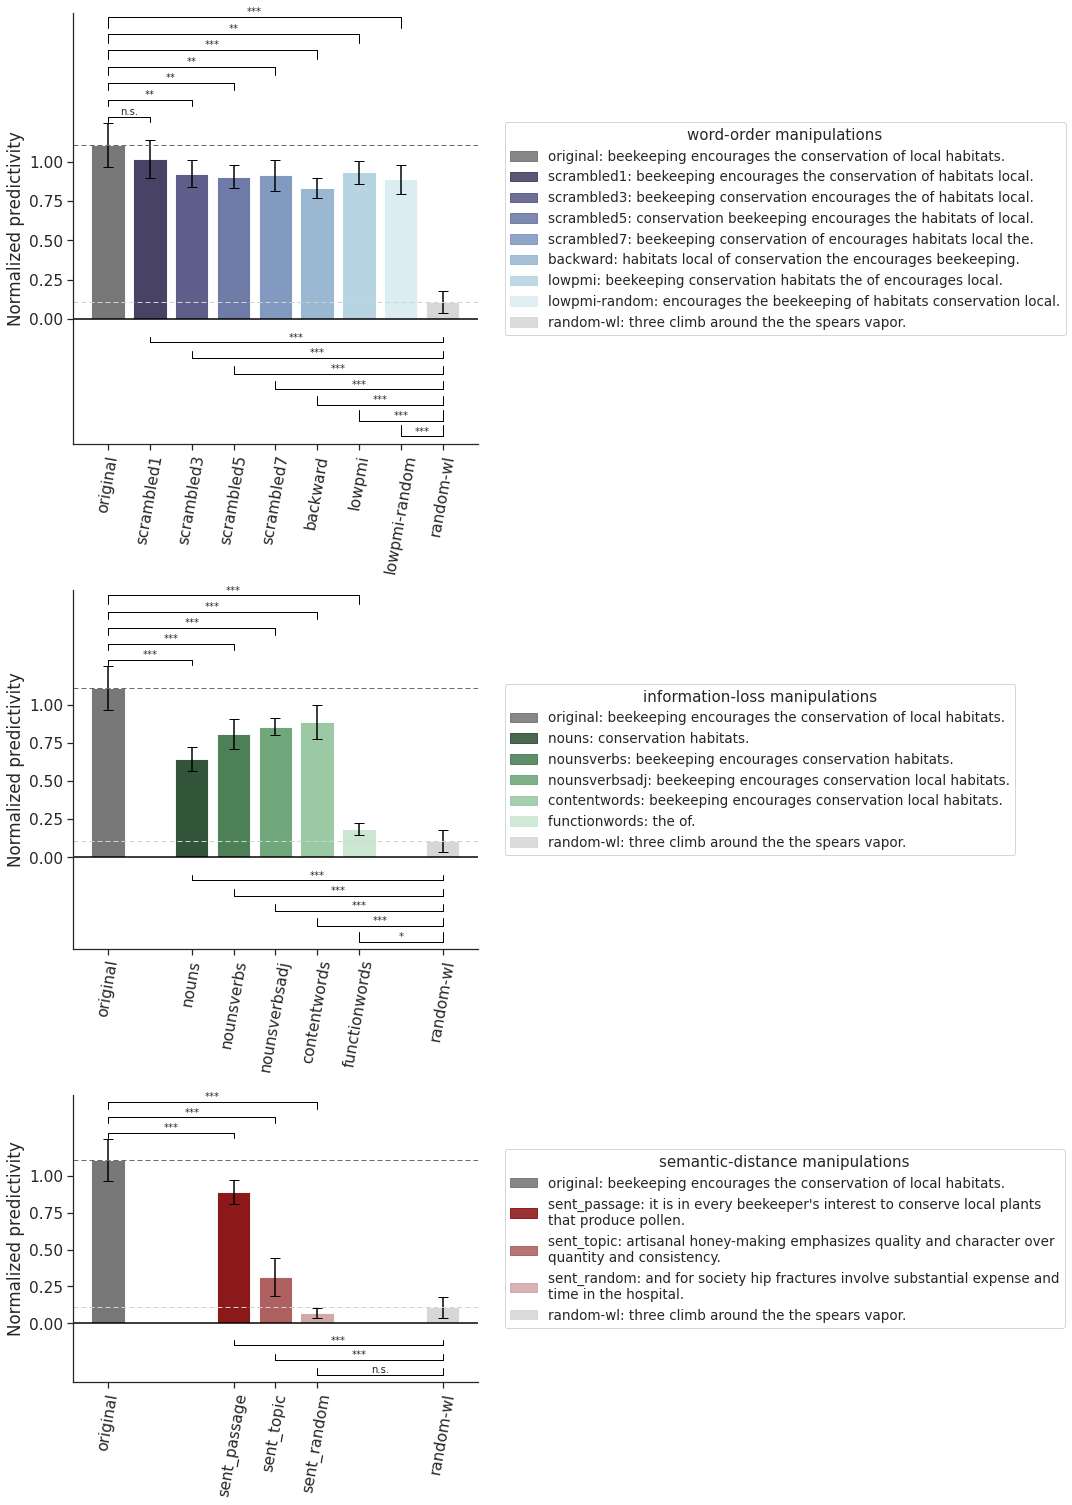

In [22]:
#VERTICAL STACKING

categories = ["word-order", "information-loss", "semantic-distance"]
if randomnouns:
    categories=["information-loss"]
num_bars = [len(full_df[full_df["category"] == cat]) for cat in categories]
max_bars = max(num_bars)
nrows = len(categories)

fig2 = plt.figure(constrained_layout=True, figsize=(15, 7*nrows), facecolor='white')
props = [1 + 0.2*x for x in num_bars]
spec2 = GridSpec(ncols=1, nrows=nrows, figure=fig2, height_ratios=props)
f2_ax = []

to_add = 0
    
for ind, current_category in enumerate(categories):
    #set up subplot
    f2_ax.append(fig2.add_subplot(spec2[ind, 0]))

    categories = ["original", current_category, "control"]
    plot_df = full_df[full_df["category"].isin(categories)]
    
    colors = [CAT2COLOR["original"]] + CAT2COLOR[current_category] + [CAT2COLOR["control"]]
    
    x_pos = np.arange(len(plot_df))
    scores = list(plot_df['score'])
    errors = list(plot_df['error'])
    conditions = list(plot_df['condition'])
                
    stimuli = [list(plot_df.loc[plot_df["category"] == cat]["labelname"]) for cat in categories]
    stimuli = plot_utils.flatten_list(stimuli)
    from textwrap import fill
    stimuli = [fill(l, 75) for l in stimuli]
    
    #add empty slots for same bar width
    if len(x_pos) != max_bars + 2: # +2 because of original and random-wl
        to_add = max_bars - num_bars[ind]
        x_pos = np.arange(len(plot_df) + to_add)
        multiplier = int(to_add/2)
        
        insert_at1 = 1
        insert_at2 = -1
        
        insert_elements = [np.nan]*multiplier
        #
        scores[insert_at1:insert_at1] = insert_elements
        scores[insert_at2:insert_at2] = insert_elements
        #
        errors[insert_at1:insert_at1] = insert_elements
        errors[insert_at2:insert_at2] = insert_elements
        
        insert_elements = [""]*multiplier
        #
        conditions[insert_at1:insert_at1] = insert_elements
        conditions[insert_at2:insert_at2] = insert_elements
        #
        stimuli[insert_at1:insert_at1] = insert_elements
        stimuli[insert_at2:insert_at2] = insert_elements
        
        insert_elements = ["white"]*multiplier
        colors[insert_at1:insert_at1] = insert_elements
        colors[insert_at2:insert_at2] = insert_elements

    f2_ax[-1].bar(x_pos, scores,
        yerr=errors,
        align='center',
        alpha=0.9, #color intensity
        ecolor='black',
        capsize=5, #error-bar width
        color=colors)
    
    #annotate stats 2 original
    for ind_c, cond in enumerate(CAT2COND[current_category]):
        #adjust names for consistency
        if cond == 'sentenceshuffle_random':
            cond = 'sent_random'
        elif cond == 'sentenceshuffle_passage':
            cond = 'sent_passage'
        elif cond == 'sentenceshuffle_topic':
            cond = 'sent_topic'
            
        if cond in ["original", "random-wl"]:
            continue

        idx_random = conditions.index("random-wl") - to_add

        positions = [i for i, score in enumerate(scores) if not np.isnan(score)]
        
        #add stats annotations for comparison with original score
        heights = [scores[0]] * len(positions)
        #add height offset to annotations
        height_offset = [0.1 * i for i in range(len(heights))]
        heights = [sum(x) for x in zip(heights, height_offset)]
        label = full_stats_df.loc[full_stats_df["condition"] == cond]["significance2original"].item()
        stats_utils.barplot_annotate_brackets(0, ind_c+1, data=label, center=positions, height=heights, fs=10)
        
        #add stats annotations for comparison with random-wl score
        heights = [0] * len(positions)
        #add height offset to annotations
        height_offset = [-0.1 * i for i in range(len(heights))]
        heights = [sum(x) for x in zip(heights, height_offset)]
        label = full_stats_df.loc[full_stats_df["condition"] == cond]["significance2random"].item()
        stats_utils.barplot_annotate_brackets(ind_c+1, idx_random, data=label, center=positions, height=heights,
                                             updown="down", fs=10)
    
    #add horizontal lines for original and random-wl
    orig_score = full_df[full_df["category"]=="original"]["score"].item()
    random_score = full_df[full_df["category"]=="control"]["score"].item()
    f2_ax[-1].axhline(y=orig_score, color=CAT2COLOR["original"], linestyle=':', dashes=(5, 3), linewidth=1)
    f2_ax[-1].axhline(y=random_score, color=CAT2COLOR["control"], linestyle=":", dashes=(5, 3), linewidth=1)
    
    f2_ax[-1].axhline(y=0, color="black")

    # add legend (sample stimuli)
    # map names to colors
    cmap = dict(zip(conditions, colors))
    cmap = {k: v for k, v in cmap.items() if k}
    # create the rectangles for the legend
    from matplotlib.patches import Patch
    patches = [Patch(color=v, label=k, alpha=0.8) for k, v in cmap.items()]
    # remove empty strings from labels
    stimuli = [x for x in stimuli if x]
    # add the legend
    f2_ax[-1].legend(title=f'{current_category} manipulations', labels=stimuli, handles=patches, bbox_to_anchor=(1.05, 0.5),
             loc='center left', title_fontsize=15, prop={'size': 13.5})
    
    
    f2_ax[-1].set_ylim([-0.1 + -0.1*num_bars[ind], 1.25 + 0.1*num_bars[ind]])
    
    # TICKS
    ## to get current ones: f2_ax[-1].get_yticks()
    yticks = [0, 0.25, 0.5, 0.75, 1]
    f2_ax[-1].set_yticks(yticks)
    #set yticks
    f2_ax[-1].set_xticks(positions)
    f2_ax[-1].set_xticklabels([x for x in conditions if x], rotation=80)
    
    f2_ax[-1].set_ylabel('Normalized predictivity')

    plt.tight_layout()

plt.savefig('results_paper/figure1.svg', dpi=180)

# Within manipulation category stats

In [23]:
stats_df = stats_utils.get_stats_df(model_identifier=model_identifier, emb_context=emb_context,
                                     split_coord=split_coord, testonperturbed=testonperturbed,
                                    randomnouns = randomnouns)

In [29]:
# Plot arguments
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.95, 0.55, 0.04, 0.3]}

word-order
70
               scrambled1  scrambled3  scrambled5  scrambled7  backward  \
scrambled1       1.000000    0.214531    0.179271    0.179271  0.047937   
scrambled3       0.214531    1.000000    0.862183    0.862183  0.156708   
scrambled5       0.179271    0.862183    1.000000    0.958366  0.179271   
scrambled7       0.179271    0.862183    0.958366    1.000000  0.179271   
backward         0.047937    0.156708    0.179271    0.179271  1.000000   
lowpmi           0.214531    0.958366    0.862183    0.862183  0.142825   
lowpmi-random    0.115787    0.287920    0.416019    0.422914  0.536429   

                 lowpmi  lowpmi-random  
scrambled1     0.214531       0.115787  
scrambled3     0.958366       0.287920  
scrambled5     0.862183       0.416019  
scrambled7     0.862183       0.422914  
backward       0.142825       0.536429  
lowpmi         1.000000       0.246446  
lowpmi-random  0.246446       1.000000  


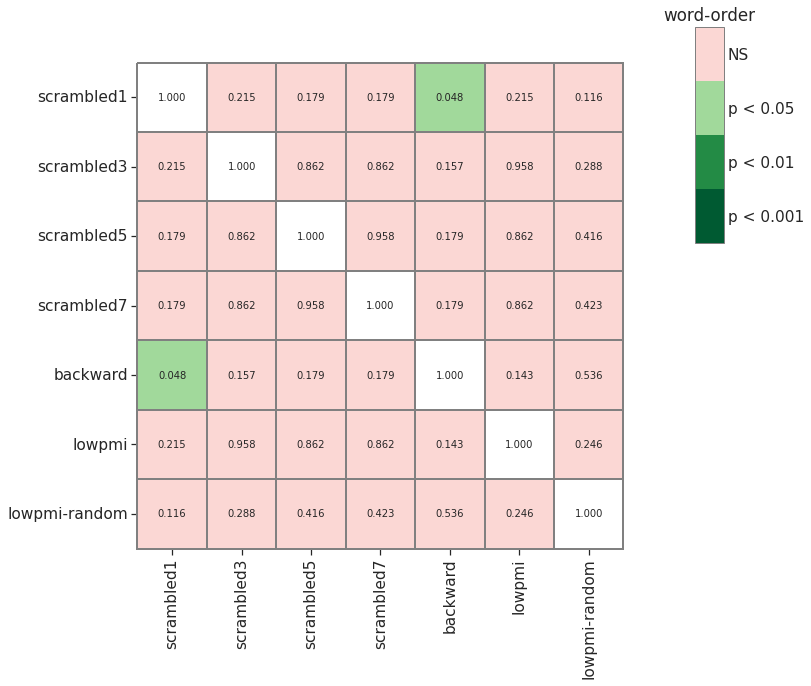

information-loss
50
                      nouns    nounsverbs  nounsverbsadj  contentwords  \
nouns          1.000000e+00  6.159888e-04   1.973284e-04  4.901225e-05   
nounsverbs     6.159888e-04  1.000000e+00   3.515514e-01  1.797307e-01   
nounsverbsadj  1.973284e-04  3.515514e-01   1.000000e+00  6.839883e-01   
contentwords   4.901225e-05  1.797307e-01   6.839883e-01  1.000000e+00   
functionwords  6.400062e-10  4.414745e-11   9.101276e-11  4.414745e-11   

               functionwords  
nouns           6.400062e-10  
nounsverbs      4.414745e-11  
nounsverbsadj   9.101276e-11  
contentwords    4.414745e-11  
functionwords   1.000000e+00  


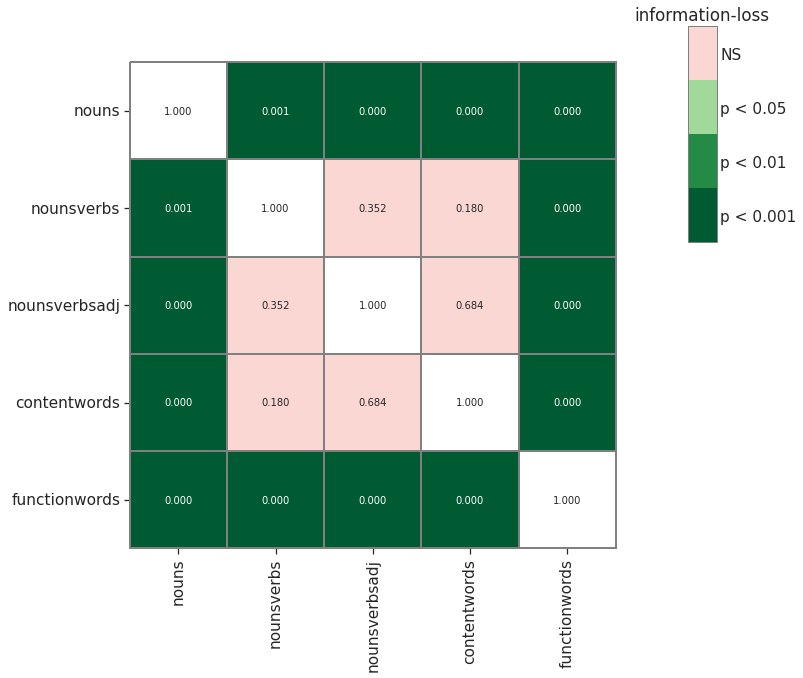

semantic-distance
30
              sent_passage    sent_topic   sent_random
sent_passage  1.000000e+00  1.408350e-10  1.669734e-14
sent_topic    1.408350e-10  1.000000e+00  2.867047e-05
sent_random   1.669734e-14  2.867047e-05  1.000000e+00


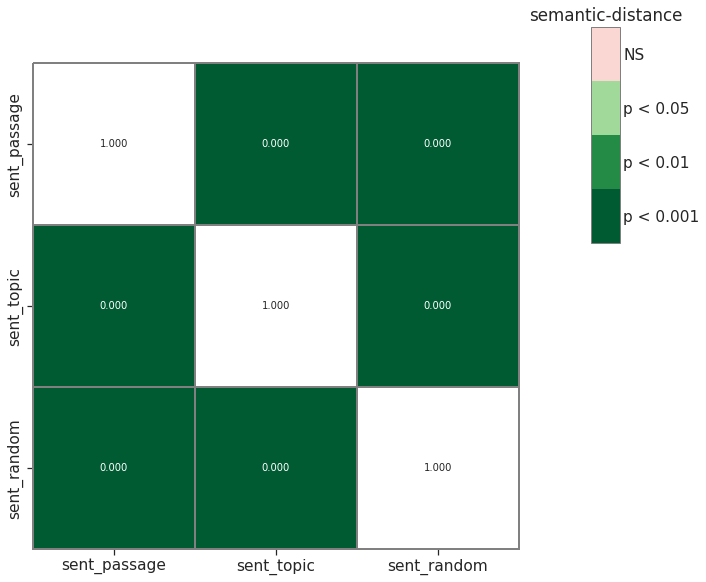

In [34]:
import scikit_posthocs as sp

CAT2COND, COND2CAT = plot_utils.get_conditions()
categories = [x for x in CAT2COND.keys() if x not in ['original', 'control']]

for category in categories:
    print(category)
    sub_df = stats_df.loc[stats_df["category"] == category]
    print(len(sub_df))
    ttest = sp.posthoc_ttest(sub_df, val_col='values', group_col='condition', p_adjust='fdr_bh')
    print(ttest)
        
    plt.figure(figsize=(10,10))
    sp.sign_plot(ttest, annot=ttest, fmt='.3f', **heatmap_args)
    plt.subplots_adjust(top=0.8) 
    plt.title(f'{category}')
    
    ttest_df = pd.DataFrame(ttest)
    ttest_df["manipulation"] = [f"{category}"] * len(ttest_df)
    ttest_df.to_csv(f'results_paper/stats_figure1_within_condition={category}.csv')

    plt.show()

In [ ]:
break

### 3. Define plot function

In [ ]:
main_plotly("gpt2", testonperturbed=True)

In [ ]:
main_plotly("gpt2")

In [ ]:
def main_plotly(model_identifier, emb_context="Passage", split_coord="Sentence", testonperturbed=False):
    scores_df = plot_utils.get_best_scores_df(model_identifier, emb_context=emb_context,
                                      split_coord=split_coord, testonperturbed=testonperturbed)
    barplot_plotly(model_identifier, scores_df, emb_context=emb_context,
            split_coord=split_coord, testonperturbed=testonperturbed)

In [ ]:
# barplot("distilgpt2", scores_df)

In [ ]:
def barplot_plotly(model_identifier, scores_df, emb_context="Passage", split_coord="Sentence", testonperturbed=False):
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    colors = sns.color_palette("rocket")[1:]

    #get proportions for subplot width
    categories = ["original", "control", "information_loss", "meaning", "word_order"]
    props = [len(scores_df.loc[scores_df["category"] == cat])/len(scores_df) for cat in categories]

    #make subplot
    fig = make_subplots(rows=1, cols=len(categories), column_widths=props, shared_yaxes=True, subplot_titles = categories)

    for ind, key in enumerate(categories):
        #subset df
        curr_df = scores_df.loc[scores_df["category"] == key]
        curr_color = colors[ind]
        #add figure trace
        fig.add_trace(
            go.Bar(name=key, x=list(curr_df["condition"]), y=list(curr_df["score"]),
#             marker_color=curr_color,
            error_y={
                "type": "data",
                "array": list(curr_df["error"])
            }
        ),row=1, col=ind+1)

        #uodate layout
    title = f"{model_identifier}"
    if not testonperturbed:
        title += f" | Trained and tested on perturbed"
    fig.update_layout(title_text=f"{model_identifier}",
                      showlegend=False) 
    fig.update_xaxes(tickangle=270)

    if save:
        if not os.path.exists("images"):
            os.mkdir("images")
        fig.write_image(f"images/newest_{title}.png")

    fig.show()

In [ ]:
save = False

In [ ]:
# !pip install -U kaleido

# PLOTLY EXPRESS

In [ ]:
colors = sns.color_palette("rocket")[1:]
sns.catplot(data=scores_df, x='condition', y='score', hue='model', col='category', kind='bar', sharex=False)

In [ ]:
scores_df = main_multi(plotting_models, testonperturbed=True)

In [ ]:
plotting_models = ["distilgpt2", "distilgpt2-avgtoken"]
scores_df = main_multi(plotting_models)

In [ ]:
plt1.set_title("A")
plt2.set_title("B")

full_plt = plt1/plt2
full_plt.savefig("images/newest_resultRobustness_gpt2versions.png")
full_plt.show()

In [ ]:
#!pip install patchworklib

In [ ]:
plt2 = main_multi(plotting_models, testonperturbed=True)

In [ ]:
plt1 = main_multi(plotting_models)

In [ ]:
plotting_models = ["distilgpt2", "gpt2", "gpt2-xl"]

In [ ]:
import pandas as pd

def main_multi(list_of_model_identifiers, emb_context="Passage", split_coord="Sentence", testonperturbed=False):
    frames = []

    for model in list_of_model_identifiers:
        m_scores_df = plot_utils.get_best_scores_df(model, emb_context=emb_context,
                                    split_coord=split_coord, testonperturbed=testonperturbed)
        m_scores_df["model"] = [model] * len(m_scores_df)
        frames.append(m_scores_df)
    
    scores_df = pd.concat(frames)

    if MAD_corrected:
        scores_df["error"] = scores_df["error"].div(1.4826) #MAD is wrong
    
    barplot_multi(list_of_model_identifiers, scores_df, emb_context=emb_context,
            split_coord=split_coord, testonperturbed=testonperturbed)
    
    return plt

In [ ]:
save=True

def barplot_multi(list_of_model_identifiers, scores_df, emb_context="Passage", split_coord="Sentence", testonperturbed=False):

    colors = sns.color_palette("rocket")[1:]
    sns.set(font_scale=1.4)

    #get proportions for subplot width
    categories = ["original", "controls", "information-loss", "sentence-meaning", "word-order"]
    props = [len(scores_df.loc[scores_df["category"] == cat])/len(scores_df) for cat in categories]

    g = sns.catplot(data=scores_df, x='condition', y='score', hue='model', col='category', kind='bar', sharex=False,
                    facet_kws={'gridspec_kws': {"width_ratios": props}}, height=7, aspect=.45, legend_out=True)
 
          
   # g.map(plt.errorbar, "condition", "score", "error", ls='none', color="k", capsize=5)
    g.set_titles(col_template="{col_name}")
    g.set_xlabels("")
    g.set_xticklabels(rotation=80)
    
    if not "gpt2-xl" in list_of_model_identifiers:
        g.set(ylim=(0, 1))
    else:
        g.set(ylim=(0, 1.25))
    
        title_addition = " | decontextualized"
        
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 0.75))
    g.fig.tight_layout()

    if save:
        g.savefig(f'images/newest_match-to-brain_allgpts.png', bbox_inches='tight', dpi=240)

    plt.show()
    return g.fig

# All models barplot

In [ ]:
main("distilgpt2-avgtoken", testonperturbed=True)

In [ ]:
main("distilgpt2-avgtoken")

In [ ]:
main("distilgpt2", emb_context='Sentence')